# First Name : Shwe Moe
# Last Name : Thant

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nesarc = pd.read_csv('nesarc.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

# From Prac 1
# Columns/Data used in Prac 1

In [3]:
nesarc['S2AQ5B'] = pd.to_numeric(nesarc['S2AQ5B'], errors='coerce') #convert variable to numeric
nesarc['S2AQ5D'] = pd.to_numeric(nesarc['S2AQ5D'], errors='coerce') #convert variable to numeric
nesarc['S2AQ5A'] = pd.to_numeric(nesarc['S2AQ5A'], errors='coerce') #convert variable to numeric
nesarc['S2BQ1B1'] = pd.to_numeric(nesarc['S2BQ1B1'], errors='coerce') #convert variable to numeric
nesarc['AGE'] = pd.to_numeric(nesarc['AGE'], errors='coerce') #convert variable to numeric

# From Prac 2
# A subset of nesarc data, with the following criteria
# Age from 26 to 50
# Beer drinking status - S2AQ5A = Y

In [4]:
sub1=nesarc[(nesarc['AGE']>=26) & (nesarc['AGE']<=50) & (nesarc['S2AQ5A']==1)]
sub2=sub1.copy()

# From Prac 2
# SETTING MISSING DATA

In [5]:
sub2['S2AQ5D']=sub2['S2AQ5D'].replace(99, np.nan)

sub2['S2AQ5B']=sub2['S2AQ5B'].replace(8, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(9, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(10, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(99, np.nan)

sub2['S2BQ1B1']=sub2['S2BQ1B1'].replace(9, np.nan)

# From Prac 2
# Recode data

In [6]:
recode2 = {1:30, 2:26, 3:14, 4:8, 5:4, 6:2.5, 7:1}
sub2['BEER_FEQMO']= sub2['S2AQ5B'].map(recode2)

recode3 = {2:0, 1:1}
sub2['S2BQ1B1']= sub2['S2BQ1B1'].map(recode3)

# From Prac 2
# Create secondary variables

In [7]:
# A secondary variable multiplying the number of days beer consumed/month and the approx number of 
# beer consumed/day
sub2['NUMBEERMO_EST']=sub2['BEER_FEQMO'] * sub2['S2AQ5D']

# Draw a Line chart
# Age vs Number of beer consumed per month (NUMBEERMO_EST)

# a) mean number of beer consumed
# var = mean number of beers consumed a month, grouped by age

In [9]:
var = sub2.groupby(['AGE']).NUMBEERMO_EST.mean() 
print(var)

AGE
26   23.701357
27   23.854545
28   30.035270
29   23.994949
30   24.170530
31   25.541033
32   25.678994
33   24.761017
34   23.143713
35   28.668478
36   26.813272
37   28.530387
38   26.414773
39   27.307122
40   31.571023
41   23.233788
42   31.877676
43   28.045455
44   37.279762
45   27.067241
46   31.727799
47   33.204918
48   33.655303
49   28.177778
50   28.995614
Name: NUMBEERMO_EST, dtype: float64


<IPython.core.display.Javascript object>


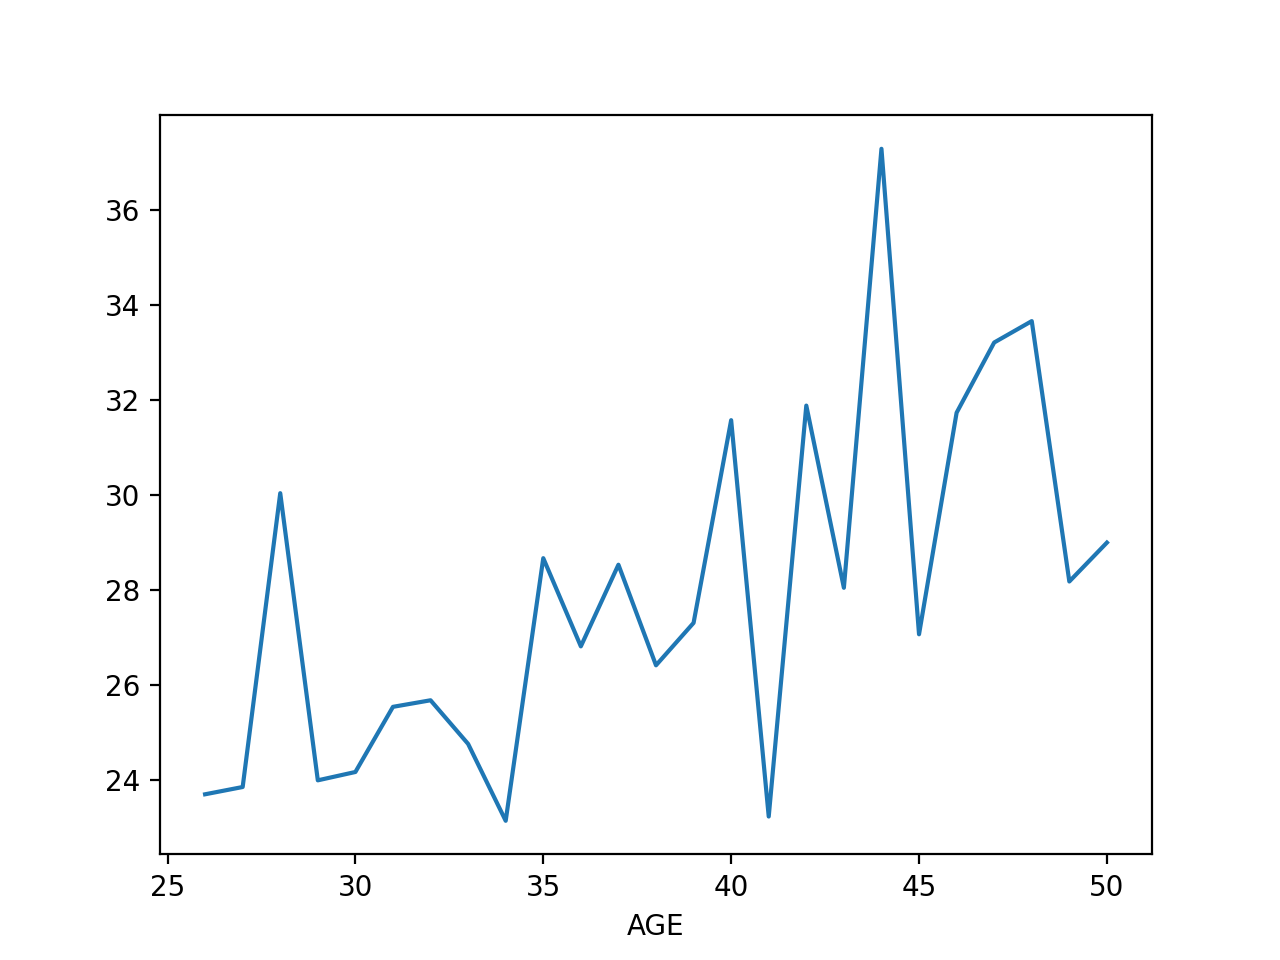

<Axes: xlabel='AGE'>

In [10]:
%matplotlib notebook 
var.plot(kind='line')

# b) total number of beer consumed
# var2 = sum number of beers consumed a month, grouped by age

In [12]:
var2 = sub2.groupby(['AGE']).NUMBEERMO_EST.sum() 
print(var2)

AGE
26    5238.000000
27    6560.000000
28    7238.500000
29    7126.500000
30    7299.500000
31    8403.000000
32    8679.500000
33    7304.500000
34    7730.000000
35    7912.500000
36    8687.500000
37   10328.000000
38    9298.000000
39    9202.500000
40   11113.000000
41    6807.500000
42   10424.000000
43    8021.000000
44    9394.500000
45    7849.500000
46    8217.500000
47    8102.000000
48    8885.000000
49    6340.000000
50    6611.000000
Name: NUMBEERMO_EST, dtype: float64


<IPython.core.display.Javascript object>


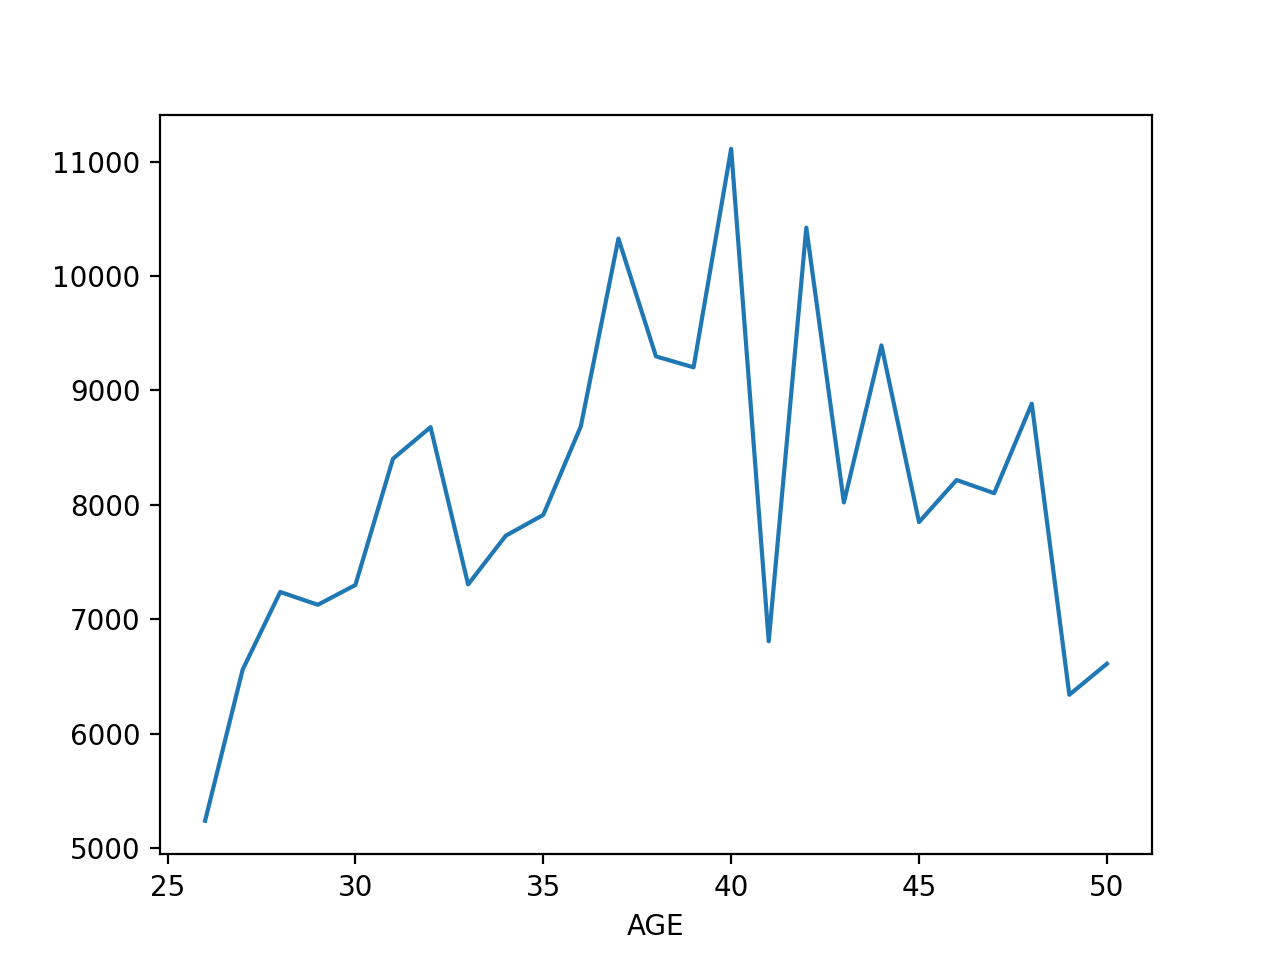

<Axes: xlabel='AGE'>

In [13]:
fig = plt.figure() 
var2.plot(kind='line')

# Draw a stacked Column Chart
# x = age (AGE)
# y = number of beers consumed per month (NUMBEERMO_EST)
# stack is based on depedency on beer (S2BQ1B1)

# var3 = mean number of beers consumed a month, grouped by age and beer depedency (S2BQ1B1)

In [14]:
var3 = sub2.groupby(['AGE','S2BQ1B1']).NUMBEERMO_EST.sum() 
print(var3)

AGE  S2BQ1B1 
26   0.000000    4225.500000
     1.000000     949.000000
27   0.000000    6000.000000
     1.000000     560.000000
28   0.000000    5542.500000
     1.000000    1686.500000
29   0.000000    5363.500000
     1.000000    1675.000000
30   0.000000    5942.500000
     1.000000    1244.000000
31   0.000000    7185.500000
     1.000000    1212.500000
32   0.000000    7352.500000
     1.000000    1288.500000
33   0.000000    6279.000000
     1.000000     901.500000
34   0.000000    6672.000000
     1.000000    1039.500000
35   0.000000    7264.500000
     1.000000     518.000000
36   0.000000    7190.000000
     1.000000    1420.000000
37   0.000000    7765.000000
     1.000000    2531.000000
38   0.000000    7962.000000
     1.000000    1294.000000
39   0.000000    8519.000000
     1.000000     667.500000
40   0.000000   10030.500000
     1.000000    1022.500000
41   0.000000    6047.000000
     1.000000     755.500000
42   0.000000    9352.500000
     1.000000     986.500000


<IPython.core.display.Javascript object>


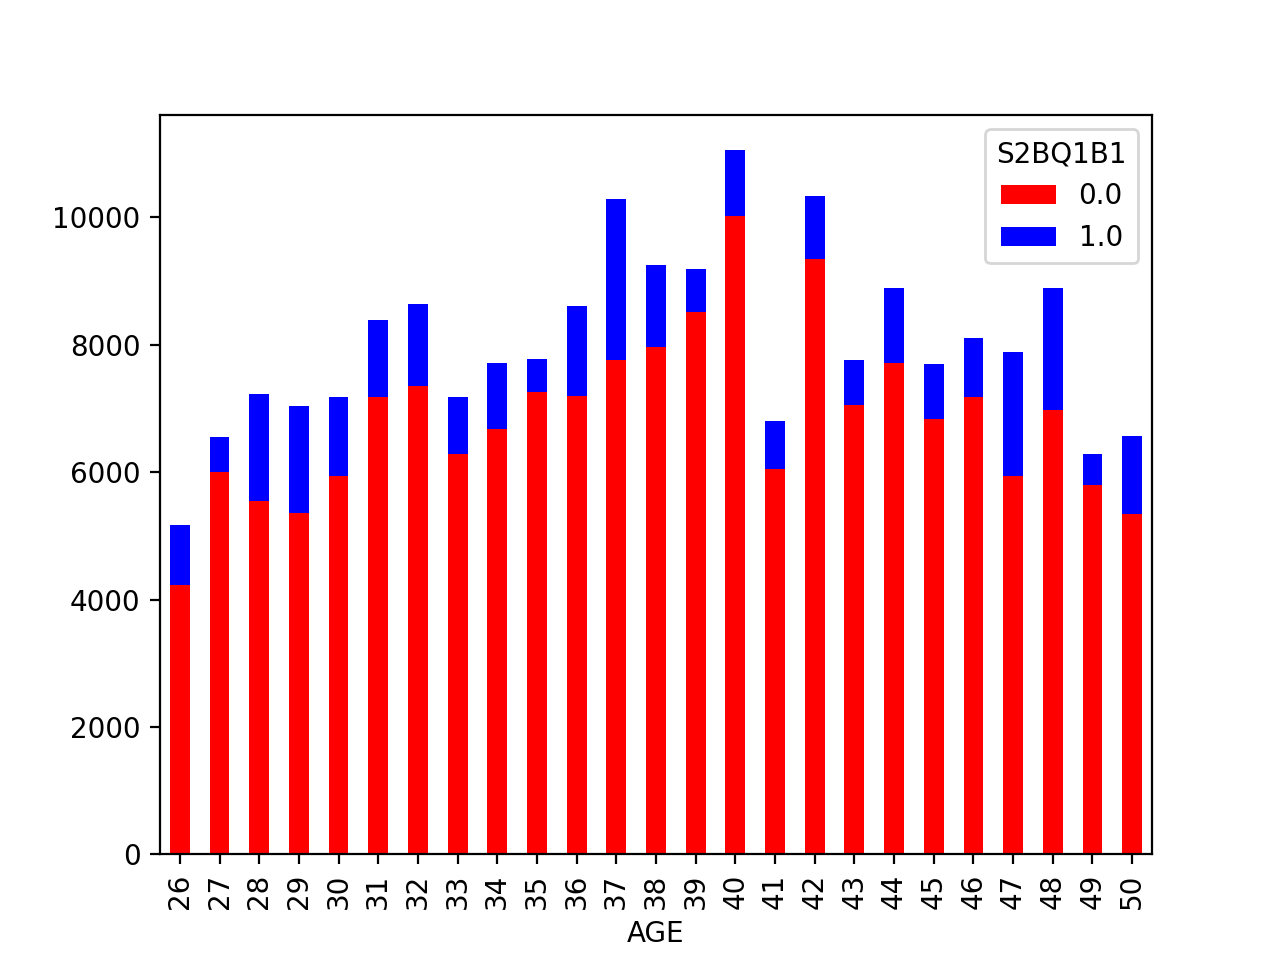

<Axes: xlabel='AGE'>

In [15]:
var3.unstack().plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

# Draw a horizontal stacked Column Chart
# x = age (AGE)
# y = number of beers consumed per month (NUMBEERMO_EST)
# stack is based on depedency on  beer (S2BQ1B1)

<IPython.core.display.Javascript object>


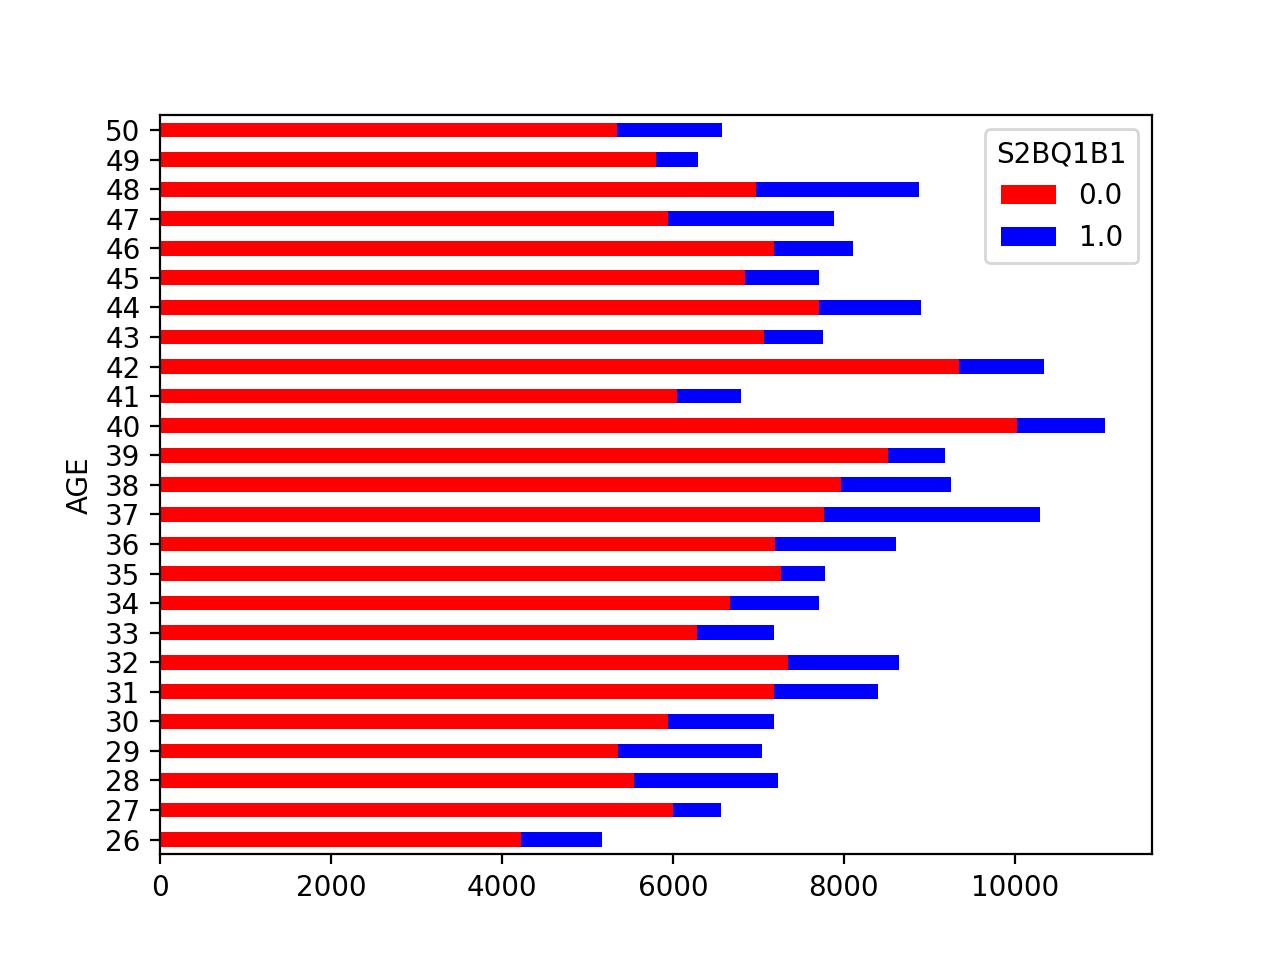

<Axes: ylabel='AGE'>

In [16]:
var3.unstack().plot(kind='barh', stacked=True, color=['red','blue'], grid=False)

# Draw a Pie Chart showing age (AGE) and total beer consumed a month (NUMBEERMO_EST)
# hint use var2

In [17]:
print(var2)

AGE
26    5238.000000
27    6560.000000
28    7238.500000
29    7126.500000
30    7299.500000
31    8403.000000
32    8679.500000
33    7304.500000
34    7730.000000
35    7912.500000
36    8687.500000
37   10328.000000
38    9298.000000
39    9202.500000
40   11113.000000
41    6807.500000
42   10424.000000
43    8021.000000
44    9394.500000
45    7849.500000
46    8217.500000
47    8102.000000
48    8885.000000
49    6340.000000
50    6611.000000
Name: NUMBEERMO_EST, dtype: float64


<IPython.core.display.Javascript object>


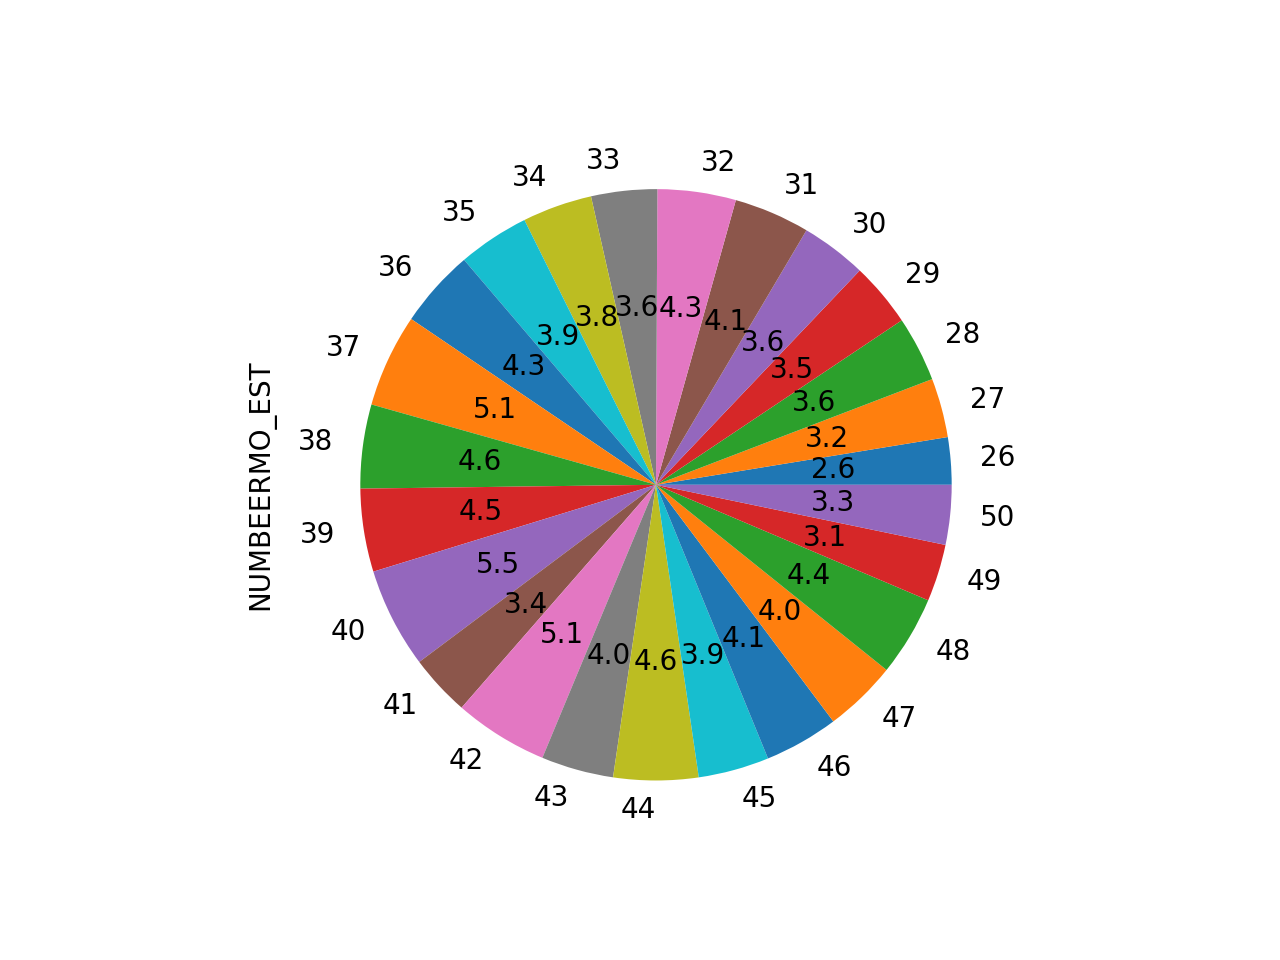

<Axes: ylabel='NUMBEERMO_EST'>

In [19]:
fig = plt.figure() 
var2.plot(kind='pie',autopct='%.1f')

# Draw a Violin Plot for age (AGE) and income (S1Q10A)

# convert income (S1Q10A) to numeric

In [20]:
sub2['S1Q10A'] = pd.to_numeric(nesarc['S1Q10A']) #convert variable to numeric

# Plot violin plot

<IPython.core.display.Javascript object>


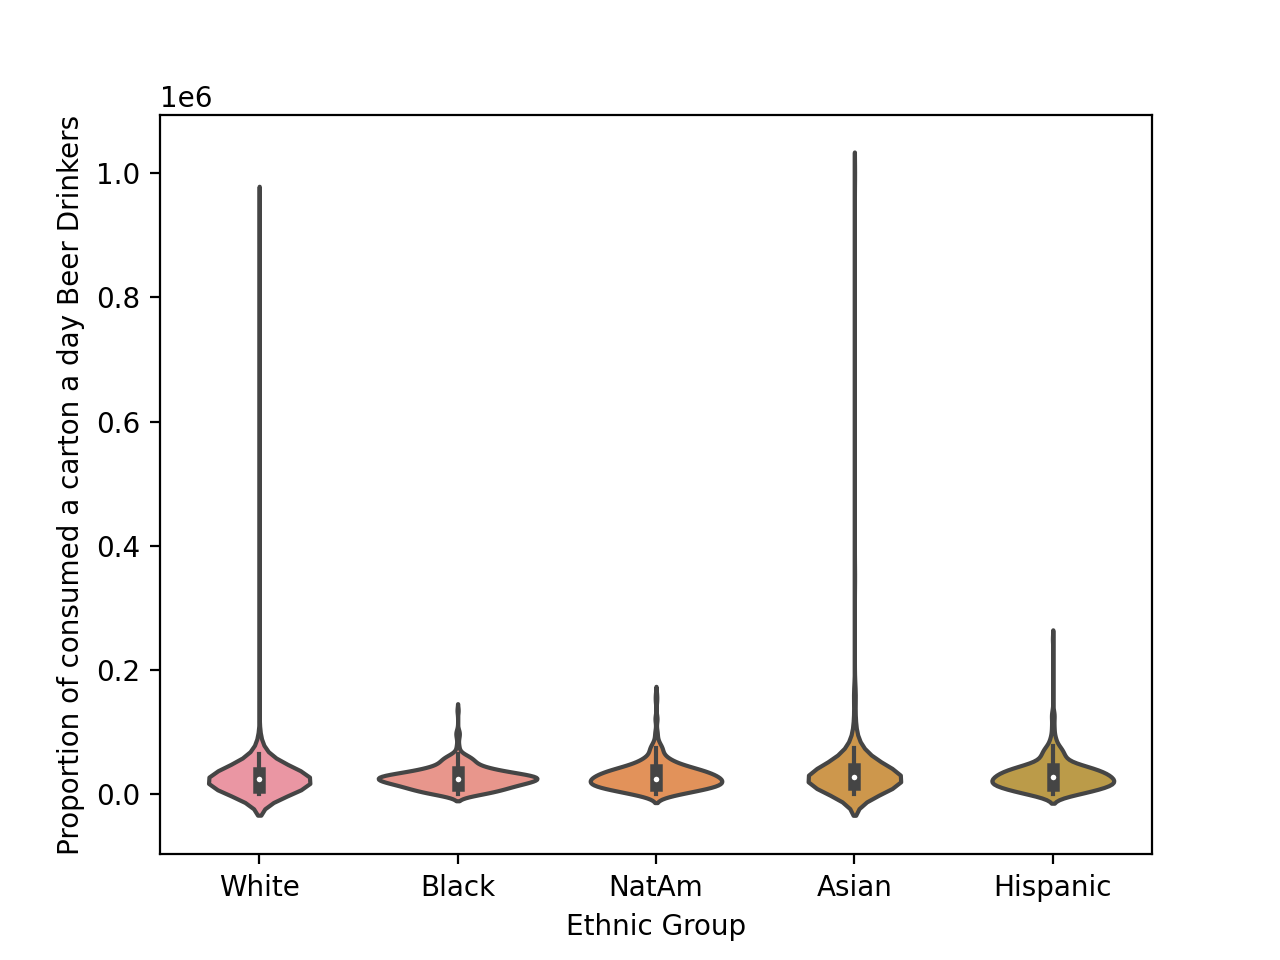

Text(0, 0.5, 'Income')

In [31]:
fig = plt.figure()
sns.violinplot(x='AGE', y='S1Q10A', data=sub2) 
plt.xlabel('Age')
plt.ylabel('Income')


# Draw a HeatMap for Ethnicity and Carton of Beer consumed per month, based on depedency on beer

# Rename Race - From Module 4

In [32]:
# you can rename categorical variable values for graphing if original values are not in formative
# first change the variable format to categorical if you haven’t already done so 
sub2['ETHRACE2A'] = sub2['ETHRACE2A'].astype('category')

sub2['ETHRACE2A']=sub2['ETHRACE2A'].cat.rename_categories(["White", "Black", "NatAm", "Asian", "Hispanic"])


# Create a new variable CARTON_ADAY using CARTON_ADAY function provided

In [33]:
def CARTON_ADAY (row):
    if row['BEER_FEQMO'] >= 30 :
        return 1
    elif row['BEER_FEQMO'] < 30 :
        return 0

sub2['CARTON_ADAY'] = sub2.apply (lambda row: CARTON_ADAY (row),axis=1)


# Print the size of CARTON_ADAY, grouped by category

In [42]:
c4= sub2.groupby('CARTON_ADAY').size()
print(c4)

CARTON_ADAY
0.000000    6897
1.000000     417
dtype: int64


# Draw bar chart to show relationship between race (ETHRACE2A) and CARTON_ADAY

In [53]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='ETHRACE2A', y='CARTON_ADAY', data=sub2, errorbar=None)
plt.xlabel('Ethnic Group')
plt.ylabel('Proportion of consumed a carton a day Beer Drinkers')
plt.show()


# Make copy of just race (ETHRACE2A) and CARTON_ADAY

In [54]:
sub3 = sub2[['ETHRACE2A','CARTON_ADAY']].copy()
sub3.head()

,ETHRACE2A,CARTON_ADAY
1,Hispanic,NaN
8,White,NaN
12,Asian,0.000000
16,White,NaN
24,Hispanic,NaN


# Create pivot table of race (ETHRACE2A) and CARTON_ADAY

In [56]:
table = pd.pivot_table(sub3, index=['ETHRACE2A'], columns=['CARTON_ADAY'], aggfunc=np.size)
print(table)


CARTON_ADAY  0.000000  1.000000
ETHRACE2A                      
White            8312       456
Black            1972       234
NatAm             222        14
Asian             374        16
Hispanic         2914       114


# Draw heat map

<IPython.core.display.Javascript object>


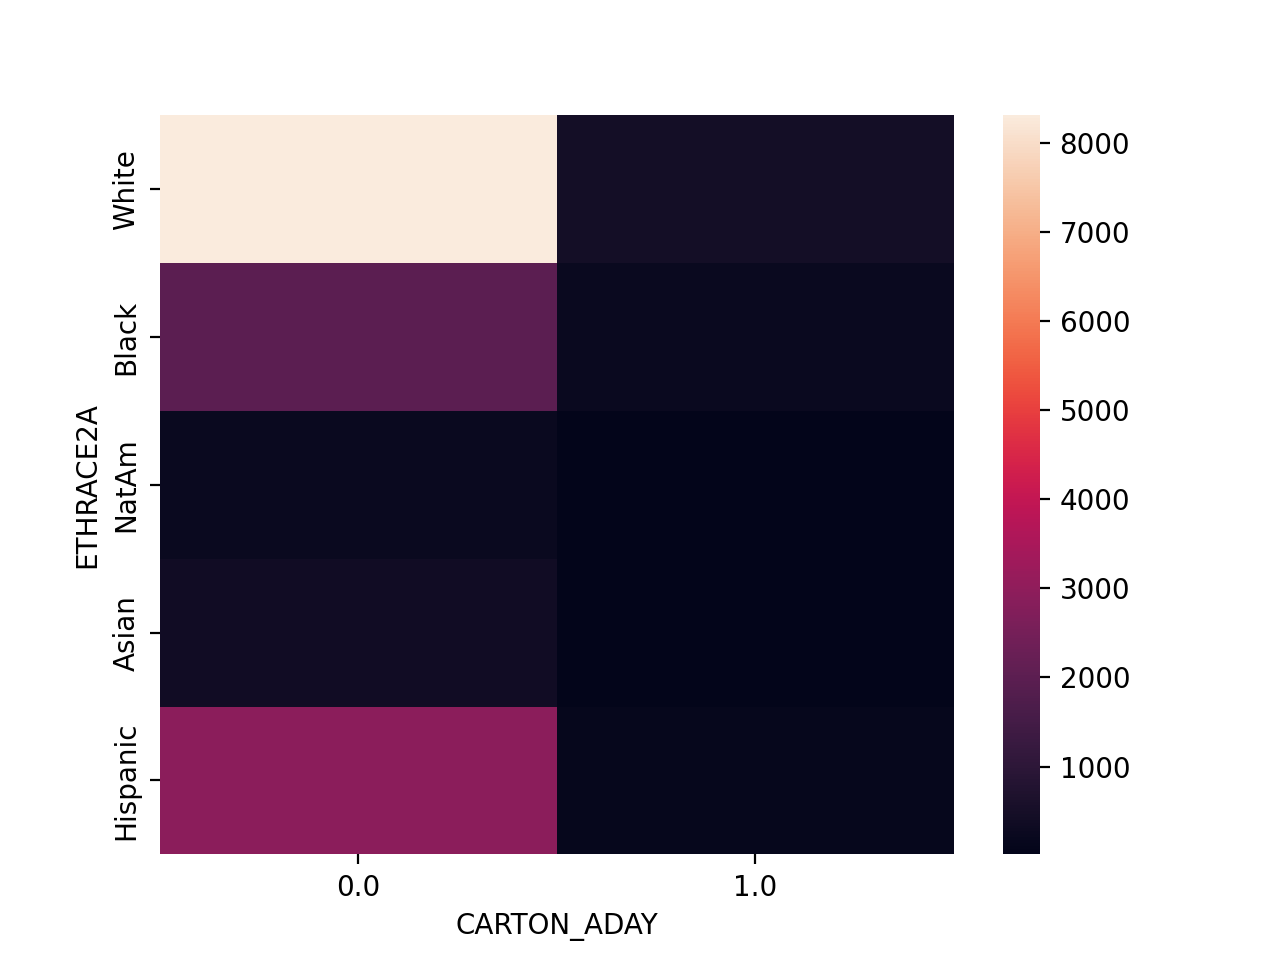

<Axes: xlabel='CARTON_ADAY', ylabel='ETHRACE2A'>

In [57]:
fig = plt.figure() 
sns.heatmap(table)

# Draw a bubble Chart

# Read in gapminder.csv

In [58]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)

gapminder = pd.read_csv('gapminder.csv', low_memory=False)
gapminder.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


# Convert internetuserate, urbanrate and incomeperperson to numeric 

In [60]:
gapminder['internetuserate'] = pd.to_numeric(gapminder['internetuserate'],errors='coerce')
gapminder['urbanrate'] = pd.to_numeric(gapminder['urbanrate'],errors='coerce') 
gapminder['incomeperperson'] = pd.to_numeric(gapminder['incomeperperson'],errors='coerce')


In [61]:
gapminder_clean=gapminder.dropna()

# Draw a bubble Chart
# x = urbanrate
# y = income per person
# bubble size = internetuserate

<IPython.core.display.Javascript object>


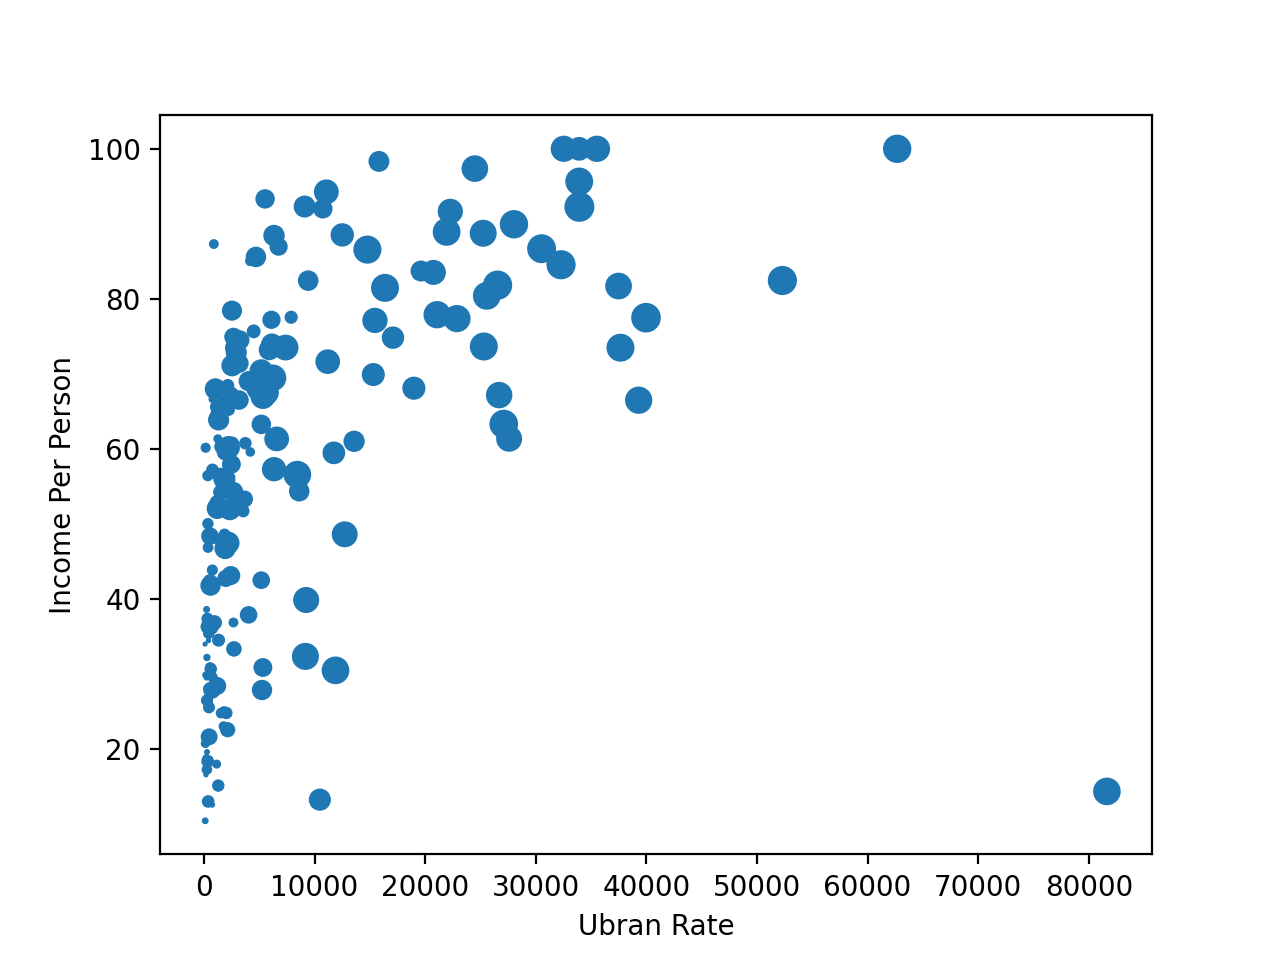

Text(0, 0.5, 'Income Per Person')

In [66]:
# x = internetuserate # y = incomeperperson
# Added third variable income as size of the bubble
%matplotlib notebook 
fig = plt.figure()
plt.scatter(gapminder_clean['incomeperperson'],gapminder_clean['urbanrate'], s=gapminder_clean['internetuserate'])
plt.xlabel('Ubran Rate') 
plt.ylabel('Income Per Person')
